In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [2]:
config = load_config_and_check("../config/experiment_v10.yaml")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from analyser import Explorer

In [5]:
exp = Explorer(config)

BENCHMARK: qasm_bench_mid - PROGRAM INFO - reading ...  
BENCHMARK: tket_bench_1 - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_qiskit - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_cirq - PROGRAM INFO - reading ...  
BENCHMARK: program_vs_random - PROGRAM INFO - reading ...  
BENCHMARK: negation - PROGRAM INFO - reading ...  
BENCHMARK: program_x_vs_program_y - PROGRAM INFO - reading ...  
BENCHMARK: qasm_bench_mid - EXECUTION INFO - reading ...  
BENCHMARK: tket_bench_1 - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_qiskit - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_cirq - EXECUTION INFO - reading ...  
BENCHMARK: program_vs_random - EXECUTION INFO - reading ...  
BENCHMARK: negation - EXECUTION INFO - reading ...  
BENCHMARK: program_x_vs_program_y - EXECUTION INFO - reading ...  
BENCHMARK: qasm_bench_mid - GROUND TRUTH - reading ...  
BENCHMARK: tket_bench_1 - GROUND TRUTH - reading ...  
BENCHMARK: across_runs_qiskit - GROUND TRUTH - reading ...

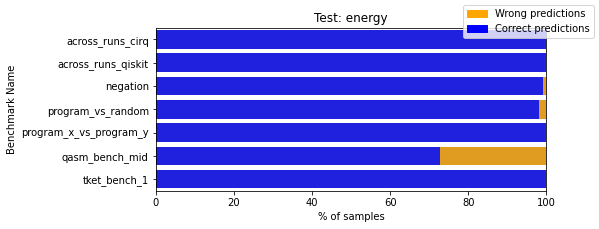

In [6]:
exp.classify_based_on_pvalue()
exp.focus_on_detector("energy")
exp.plot_benchmark_categories()

**Conclusion**: the energy test with threshold 0.001 and 8192 shots performs very well also on the test dataset.